## Comparison of PCA and LDA
- Principal Component Analysis (PCA) identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data.
- Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
sns.set()

In [3]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_long = pd.melt(iris_df, id_vars=['species'], var_name='measure', value_name='value')
iris_long.head()

,species,measure,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


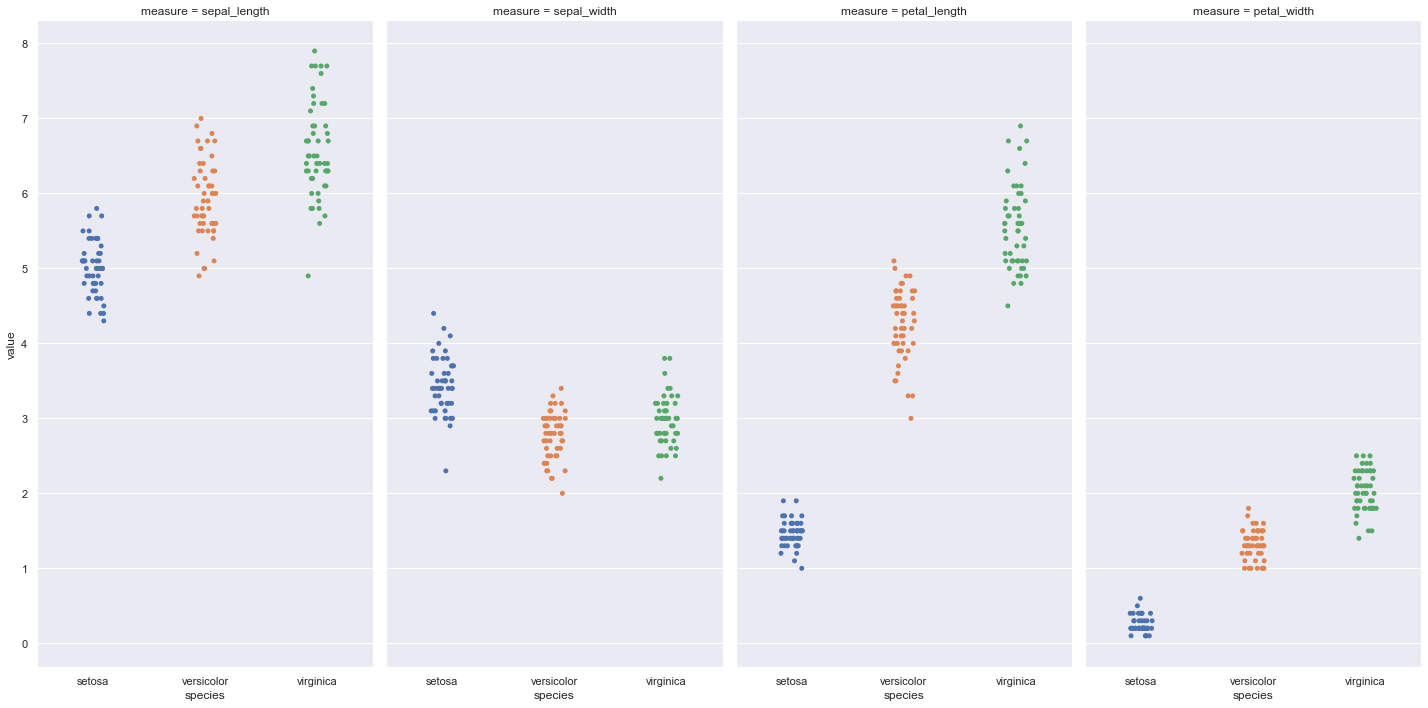

In [5]:
sns.catplot(x="species", y="value", hue="species", height=10, aspect=0.5,
                 col="measure", data=iris_long);


In [6]:
# Use the iris dataset from sklearn

In [7]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

In [8]:
X[0:5]  # sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
y[0:5]

array([0, 0, 0, 0, 0])

In [10]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### PCA with 1 component

In [12]:
# PCA

pca = PCA(n_components=1)

X_r = pca.fit(X).transform(X)

X_r.shape

(150, 1)

In [13]:
X_r[0:5]

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654]])

In [14]:
np.zeros(X_r.shape[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

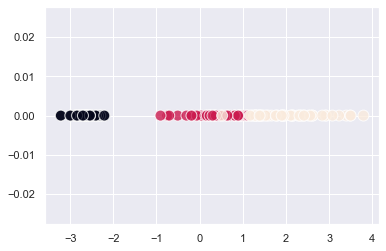

In [15]:
plt.scatter(X_r[:,0], np.zeros(X_r.shape[0]), c=iris.target, 
            alpha=0.8, s=120,  marker='o', edgecolors='white');

In [16]:
print(pca.explained_variance_ratio_)

[0.92461872]


### PCA with 2 components

In [17]:
#PCA

pca = PCA(n_components=2)

X_r = pca.fit(X).transform(X)

X_r.shape

(150, 2)

In [18]:
X_r[0:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [19]:
pca.inverse_transform(X_r)[0:5]

array([[5.08303897, 3.51741393, 1.40321372, 0.21353169],
       [4.7462619 , 3.15749994, 1.46356177, 0.24024592],
       [4.70411871, 3.1956816 , 1.30821697, 0.17518015],
       [4.6422117 , 3.05696697, 1.46132981, 0.23973218],
       [5.07175511, 3.52655486, 1.36373845, 0.19699991]])

In [20]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


### LDA (fit based on class)

In [21]:
# LDA

lda = LinearDiscriminantAnalysis(n_components=2)
LDA (fit based on class)
X_r2 = lda.fit(X, y).transform(X)

In [22]:
X_r2[0:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

In [23]:
print(lda.explained_variance_ratio_)

[0.9912126 0.0087874]


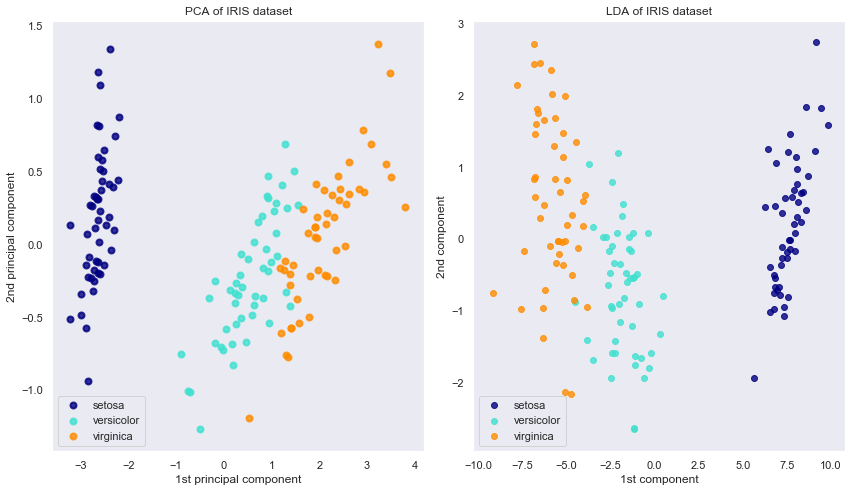

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 7))

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax1.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
    
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax2.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
    
ax1.set_title('PCA of IRIS dataset')
ax1.set_xlabel('1st principal component')
ax1.set_ylabel('2nd principal component')


ax2.set_title('LDA of IRIS dataset')
ax2.set_xlabel('1st component')
ax2.set_ylabel('2nd component')

for ax in (ax1, ax2):
    ax.legend(loc='best')
    ax.grid()
    
plt.tight_layout()